In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('./AppleStore.csv')
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [3]:
num_cols = [
    'size_bytes',
    'price',
    'rating_count_tot',
    'rating_count_ver',
    'sup_devices.num',
    'ipadSc_urls.num',
    'lang.num',
    'cont_rating',
]

cat_cols = [
    'currency',
    'prime_genre',
]

target_col = 'user_rating'

cols = num_cols + cat_cols + [target_col]

In [4]:
data = data[cols]
data['example']=data['price']*2
data['cont_rating'] = data['cont_rating'].str.slice(0, -1).astype(int)
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,currency,prime_genre,user_rating,example
0,100788224,3.99,21292,26,38,5,10,4,USD,Games,4.0,7.98
1,158578688,0.00,161065,26,37,5,23,4,USD,Productivity,4.0,0.00
2,100524032,0.00,188583,2822,37,5,3,4,USD,Weather,3.5,0.00
3,128512000,0.00,262241,649,37,5,9,12,USD,Shopping,4.0,0.00
4,92774400,0.00,985920,5320,37,5,45,4,USD,Reference,4.5,0.00


In [5]:
data.isna().mean()

size_bytes          0.0
price               0.0
rating_count_tot    0.0
rating_count_ver    0.0
sup_devices.num     0.0
ipadSc_urls.num     0.0
lang.num            0.0
cont_rating         0.0
currency            0.0
prime_genre         0.0
user_rating         0.0
example             0.0
dtype: float64

In [6]:
for col in cat_cols:
    print(f"{col} DISTRIBUTION")
    print(data[col].value_counts())
    print()

currency DISTRIBUTION
USD    7197
Name: currency, dtype: int64

prime_genre DISTRIBUTION
Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64



In [7]:
data = data.drop(columns=['currency'])
cat_cols.remove('currency')

Распределние величин

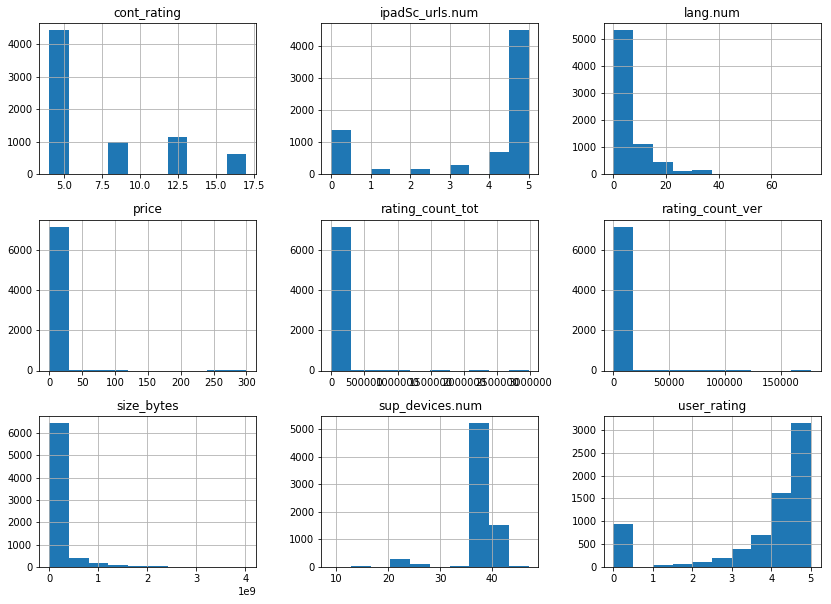

In [8]:
data.hist(column=num_cols+cat_cols+[target_col], figsize=(14, 10))
None

корреляции между фичами

In [9]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,user_rating,example
size_bytes,1,0.18,0.0045,0.0063,-0.12,0.15,0.0046,0.14,0.066,0.18
price,0.18,1,-0.039,-0.018,-0.12,0.066,-0.0067,-0.03,0.047,1
rating_count_tot,0.0045,-0.039,1,0.16,0.0088,0.016,0.14,0.0091,0.083,-0.039
rating_count_ver,0.0063,-0.018,0.16,1,0.038,0.024,0.013,0.0014,0.069,-0.018
sup_devices.num,-0.12,-0.12,0.0088,0.038,1,-0.038,-0.042,0.02,-0.042,-0.12
ipadSc_urls.num,0.15,0.066,0.016,0.024,-0.038,1,0.088,-0.11,0.27,0.066
lang.num,0.0046,-0.0067,0.14,0.013,-0.042,0.088,1,-0.07,0.17,-0.0067
cont_rating,0.14,-0.03,0.0091,0.0014,0.02,-0.11,-0.07,1,-0.098,-0.03
user_rating,0.066,0.047,0.083,0.069,-0.042,0.27,0.17,-0.098,1,0.047
example,0.18,1,-0.039,-0.018,-0.12,0.066,-0.0067,-0.03,0.047,1


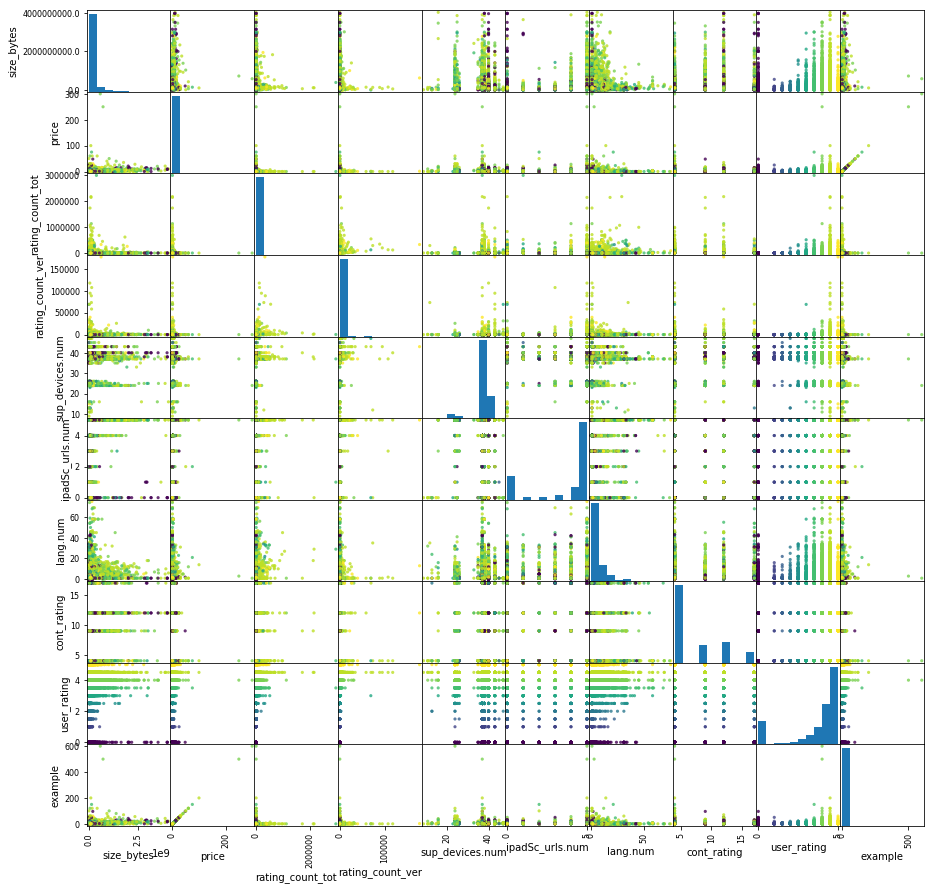

In [10]:
pd.plotting.scatter_matrix(data, c=data[target_col], figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 10}, s=10, alpha=.8)
None

In [11]:
# Добавим категориальную фичу, которая говорит, бесплатное приложение или нет
data['is_free'] = data['price'] == 0
cat_cols.append('is_free')
data.head()

,size_bytes,price,rating_count_tot,rating_count_ver,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,prime_genre,user_rating,example,is_free
0,100788224,3.99,21292,26,38,5,10,4,Games,4.0,7.98,False
1,158578688,0.00,161065,26,37,5,23,4,Productivity,4.0,0.00,True
2,100524032,0.00,188583,2822,37,5,3,4,Weather,3.5,0.00,True
3,128512000,0.00,262241,649,37,5,9,12,Shopping,4.0,0.00,True
4,92774400,0.00,985920,5320,37,5,45,4,Reference,4.5,0.00,True


In [12]:
a = pd.DataFrame.from_dict({'categorical': ['a', 'b', 'a', 'c']})
a

,categorical
0,a
1,b
2,a
3,c


In [13]:
# One-Hot-Encoding
pd.get_dummies(a)

,categorical_a,categorical_b,categorical_c
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,1


In [14]:
data = pd.get_dummies(data, columns=cat_cols)

In [15]:
cat_cols_new = []
for col_name in cat_cols:
    cat_cols_new.extend(filter(lambda x: x.startswith(col_name), data.columns))
cat_cols = cat_cols_new
print(cat_cols)

['prime_genre_Book', 'prime_genre_Business', 'prime_genre_Catalogs', 'prime_genre_Education', 'prime_genre_Entertainment', 'prime_genre_Finance', 'prime_genre_Food & Drink', 'prime_genre_Games', 'prime_genre_Health & Fitness', 'prime_genre_Lifestyle', 'prime_genre_Medical', 'prime_genre_Music', 'prime_genre_Navigation', 'prime_genre_News', 'prime_genre_Photo & Video', 'prime_genre_Productivity', 'prime_genre_Reference', 'prime_genre_Shopping', 'prime_genre_Social Networking', 'prime_genre_Sports', 'prime_genre_Travel', 'prime_genre_Utilities', 'prime_genre_Weather', 'is_free_False', 'is_free_True']


In [16]:
from sklearn.preprocessing import StandardScaler

pca = StandardScaler()
pca.fit(data[num_cols + cat_cols])
# Выход рса - numpy матрица, положим её в новую переменную со всеми фичами
X = pca.transform(data[num_cols + cat_cols])

# Или есть более простой способ
X = pca.fit_transform(data[num_cols + cat_cols])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, data[target_col], test_size=0.2)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [20]:
def print_metrics(y_preds, y):
    print(f'R^2: {r2_score(y_preds, y)}')
    print(f'MSE: {mean_squared_error(y_preds, y)}')

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print_metrics(lr.predict(X_test), y_test)

R^2: -5.058462221631372
MSE: 2.0211507947515788


In [22]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

print_metrics(knn.predict(X_test), y_test)

R^2: -1.0284094702030386
MSE: 1.951409722222222
